In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# TASK1

In [2]:
df1 = pd.read_csv('DS2_C6_S2_CarSales_Data_Challenge.csv')

In [3]:
df1.drop(['__year_resale_value','Latest_Launch'],axis=1, inplace = True)
df1.dropna(inplace = True)
df=df1.copy()
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [4]:
df.dtypes

Manufacturer           object
Model                  object
Sales_in_thousands    float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Power_perf_factor     float64
dtype: object

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [6]:
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Vehicle_type'] = label_encoder.fit_transform(df['Vehicle_type'])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [9]:
scaled_df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,0.313210


# TASK2

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.25401568432592725
For n_clusters = 3 The average silhouette_score is : 0.244081575848955
For n_clusters = 4 The average silhouette_score is : 0.19814199529299847
For n_clusters = 5 The average silhouette_score is : 0.21478074068763178
For n_clusters = 6 The average silhouette_score is : 0.17502963897624307
For n_clusters = 7 The average silhouette_score is : 0.16963559453653887
For n_clusters = 8 The average silhouette_score is : 0.18044249104566498
For n_clusters = 9 The average silhouette_score is : 0.17213076314900314


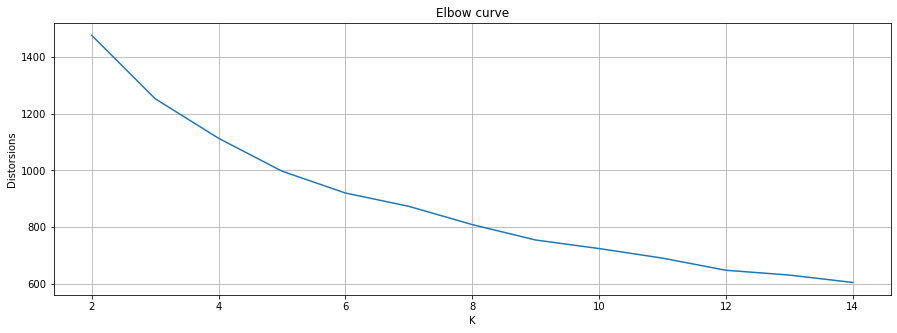

In [11]:
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

# TASK3

In [12]:
Kmeans_model = KMeans(n_clusters=2)
Kmeans_model.fit(scaled_df)

KMeans(n_clusters=2)

In [13]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[ 0.27048197, -0.03952066,  0.03517156,  0.34874479, -0.53750058,
        -0.74494394, -0.7079761 , -0.58091165, -0.70365921, -0.60114868,
        -0.76225965, -0.67303598,  0.63064318, -0.69188597],
       [-0.24993904,  0.03651909, -0.0325003 , -0.32225784,  0.49667775,
         0.68836592,  0.65420576,  0.53679178,  0.65021674,  0.55549182,
         0.70436651,  0.62191933, -0.58274623,  0.63933767]])

In [14]:
labels = Kmeans_model.labels_

In [15]:
df1['Labels'] = labels 

In [16]:
g = df1.groupby('Labels')

In [17]:
g.get_group(0).Model.unique()

array(['Integra', 'A4', '323i', '328i', 'Cavalier', 'Malibu', 'Prizm',
       'Metro', 'Sebring Coupe', 'Sebring Conv.', 'Cirrus', 'Neon',
       'Avenger', 'Stratus', 'Escort', 'Mustang', 'Contour', 'Taurus',
       'Focus', 'Ranger', 'Civic', 'Accord', 'CR-V', 'Accent', 'Elantra',
       'Sonata', 'Wrangler', 'Mirage', 'Eclipse', 'Galant', '3000GT',
       'Montero Sport', 'Mystique', 'Cougar', 'Sable', 'C-Class', 'SLK',
       'SLK230', 'CLK Coupe', 'Sentra', 'Altima', 'Cutlass', 'Alero',
       'Breeze', 'Sunfire', 'Grand Am', 'Boxter', '5-Sep', '3-Sep', 'SL',
       'SC', 'SW', 'LW', 'LS', 'Outback', 'Forester', 'Corolla', 'Camry',
       'Celica', 'Tacoma', 'RAV4', '4Runner', 'Golf', 'Jetta', 'Passat',
       'Cabrio', 'GTI', 'Beetle', 'S40', 'V40', 'S70', 'V70'],
      dtype=object)

In [18]:
g.get_group(1).Model.unique()

array(['TL', 'RL', 'A6', 'A8', '528i', 'Century', 'Regal', 'Park Avenue',
       'LeSabre', 'DeVille', 'Eldorado', 'Catera', 'Escalade', 'Lumina',
       'Monte Carlo', 'Camaro', 'Corvette', 'Impala', 'Concorde', 'LHS',
       '300M', 'Viper', 'Ram Pickup', 'Ram Wagon', 'Ram Van', 'Dakota',
       'Durango', 'Caravan', 'Crown Victoria', 'Explorer', 'Windstar',
       'Expedition', 'F-Series', 'Passport', 'Odyssey', 'I30', 'S-Type',
       'Cherokee', 'Grand Cherokee', 'ES300', 'GS300', 'GS400', 'LS400',
       'LX470', 'RX300', 'Continental', 'Town car', 'Navigator',
       'Diamante', 'Montero', 'Grand Marquis', 'Mountaineer', 'Villager',
       'E-Class', 'S-Class', 'SL-Class', 'CL500', 'M-Class', 'Maxima',
       'Quest', 'Pathfinder', 'Xterra', 'Frontier', 'Aurora', 'Bravada',
       'Silhouette', 'Voyager', 'Prowler', 'Firebird', 'Grand Prix',
       'Bonneville', 'Montana', 'Carrera Coupe', 'Carrera Cabrio',
       'Avalon', 'Sienna', 'Land Cruiser', 'C70', 'S80'], dtype=object)

### Created two dataframse based on cluster

In [21]:
cl1= df1[df1['Labels']==0]

In [22]:
cl2= df1[df1['Labels']==1]

### For First Cluster 

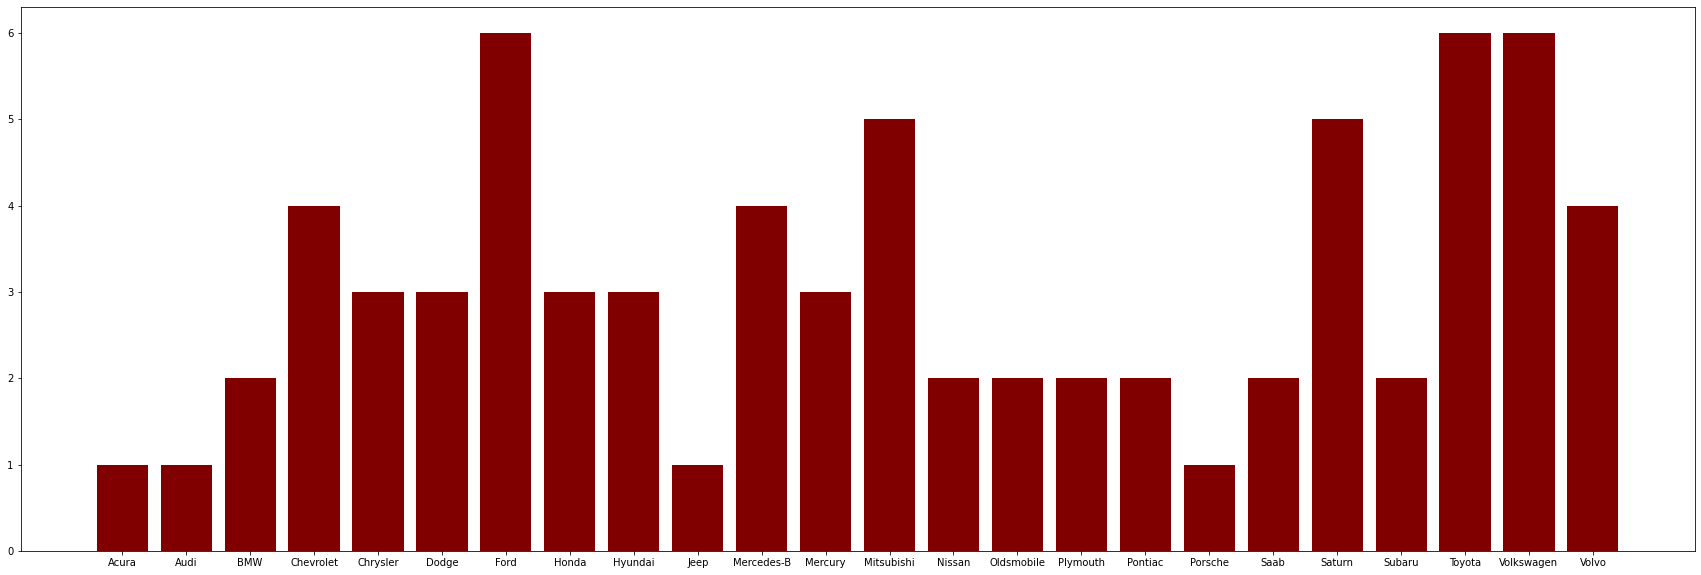

In [55]:
X = cl1[['Model','Manufacturer']].groupby('Manufacturer').count()
plt.figure(figsize=(30,10))
plt.bar(x=X.index, height=X["Model"],color ='maroon');

### For second Cluster

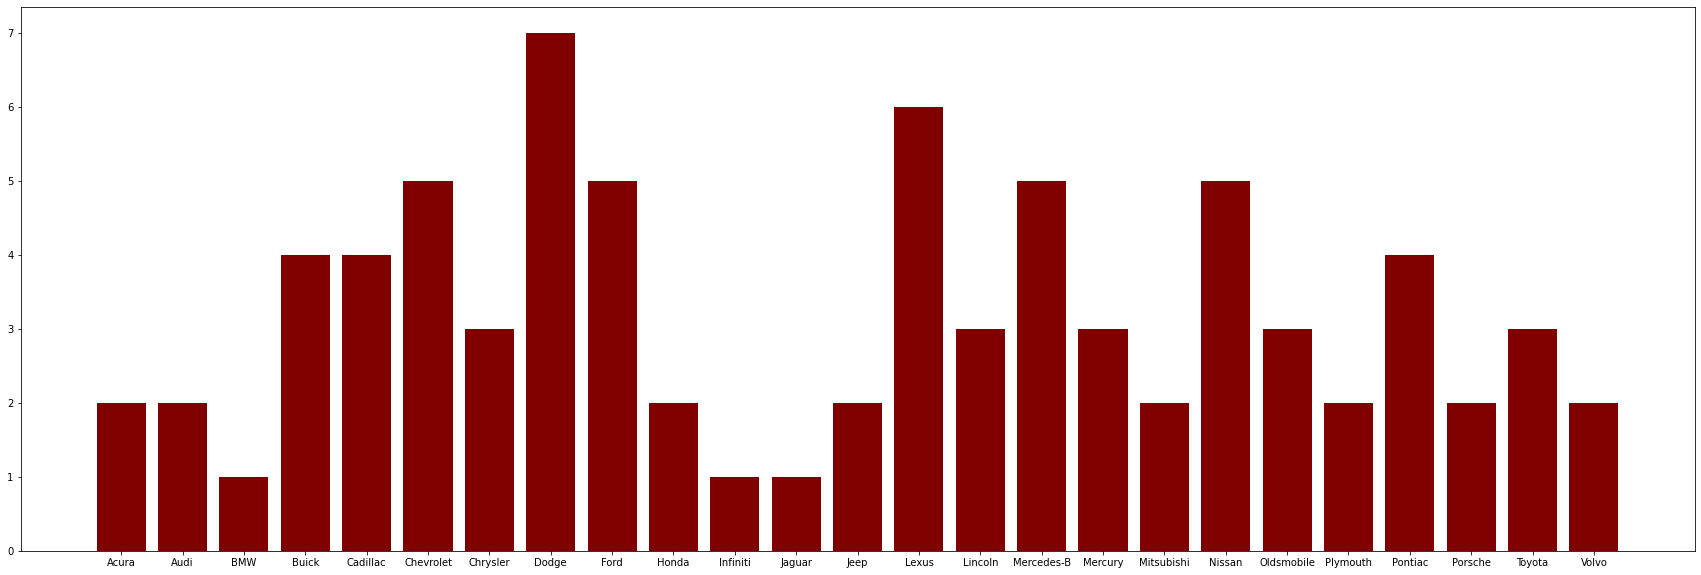

In [56]:
X = cl2[['Model','Manufacturer']].groupby('Manufacturer').count()
plt.figure(figsize=(30,10))
plt.bar(x=X.index, height=X["Model"],color ='maroon');

<AxesSubplot:ylabel='Frequency'>

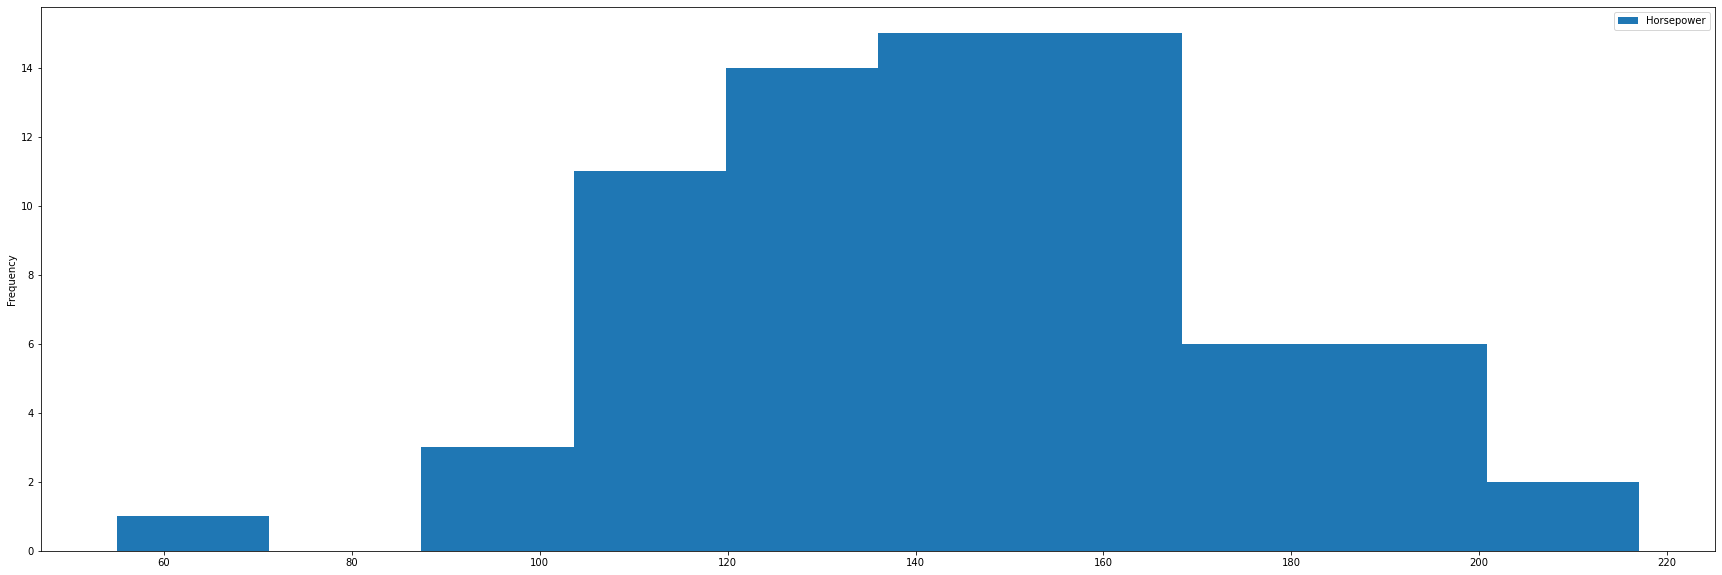

In [62]:
cl1.plot(x='Manufacturer', y = 'Horsepower', kind = 'hist', figsize=(30,10))

<AxesSubplot:ylabel='Frequency'>

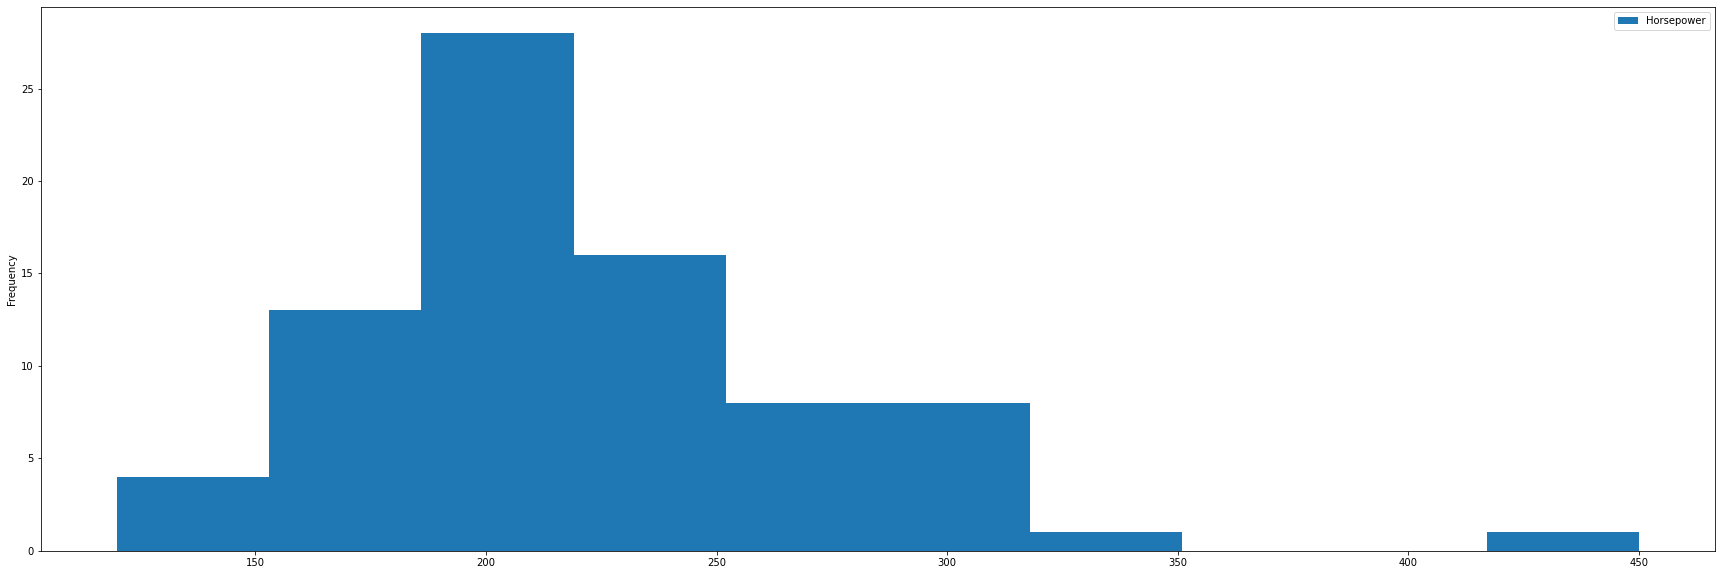

In [63]:
cl2.plot(x='Manufacturer', y = 'Horsepower', kind = 'hist', figsize=(30,10))

In [64]:
cl1.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Labels
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,0
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,0
7,BMW,323i,19.747,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207,0
8,BMW,328i,9.231,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069,0
19,Chevrolet,Cavalier,145.519,Passenger,13.26,2.2,115.0,104.1,67.9,180.9,2.676,14.3,27.0,46.363347,0


<AxesSubplot:ylabel='Frequency'>

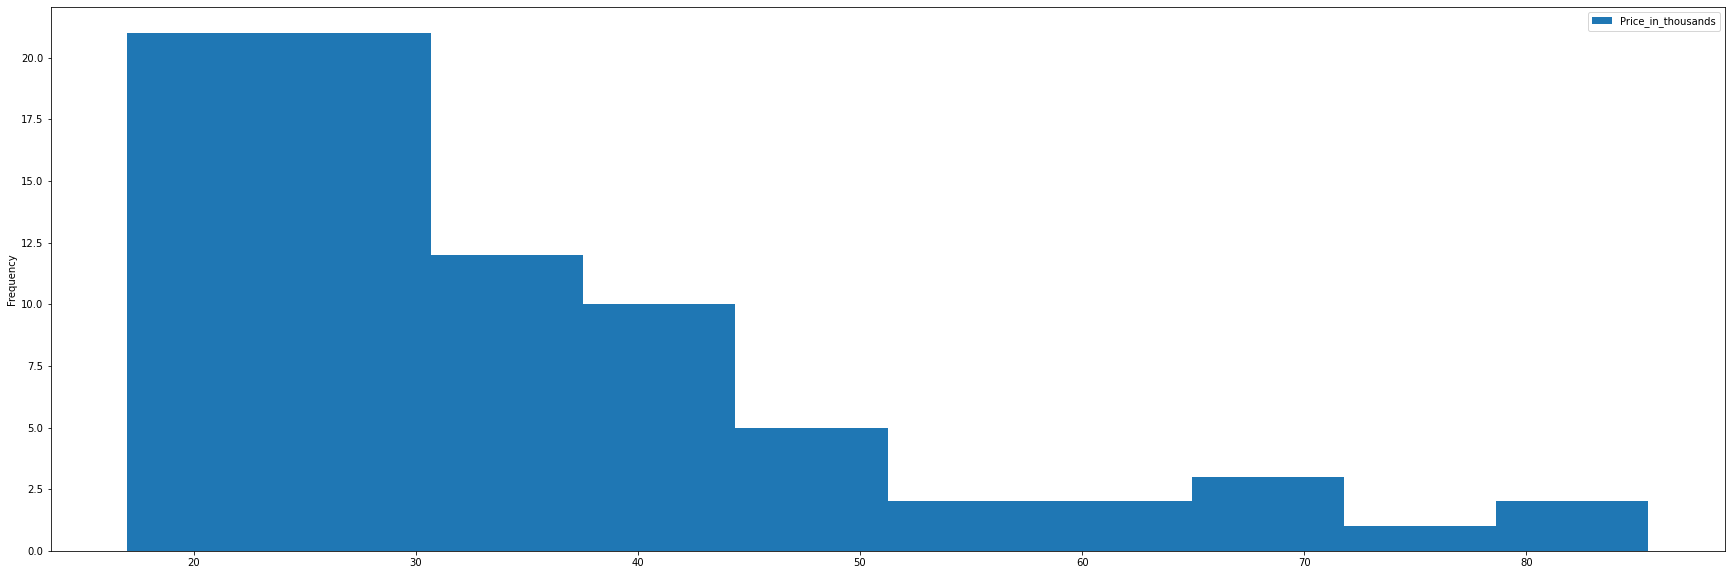

In [65]:
cl2.plot(x='Manufacturer', y = 'Price_in_thousands', kind = 'hist', figsize=(30,10))

<AxesSubplot:ylabel='Frequency'>

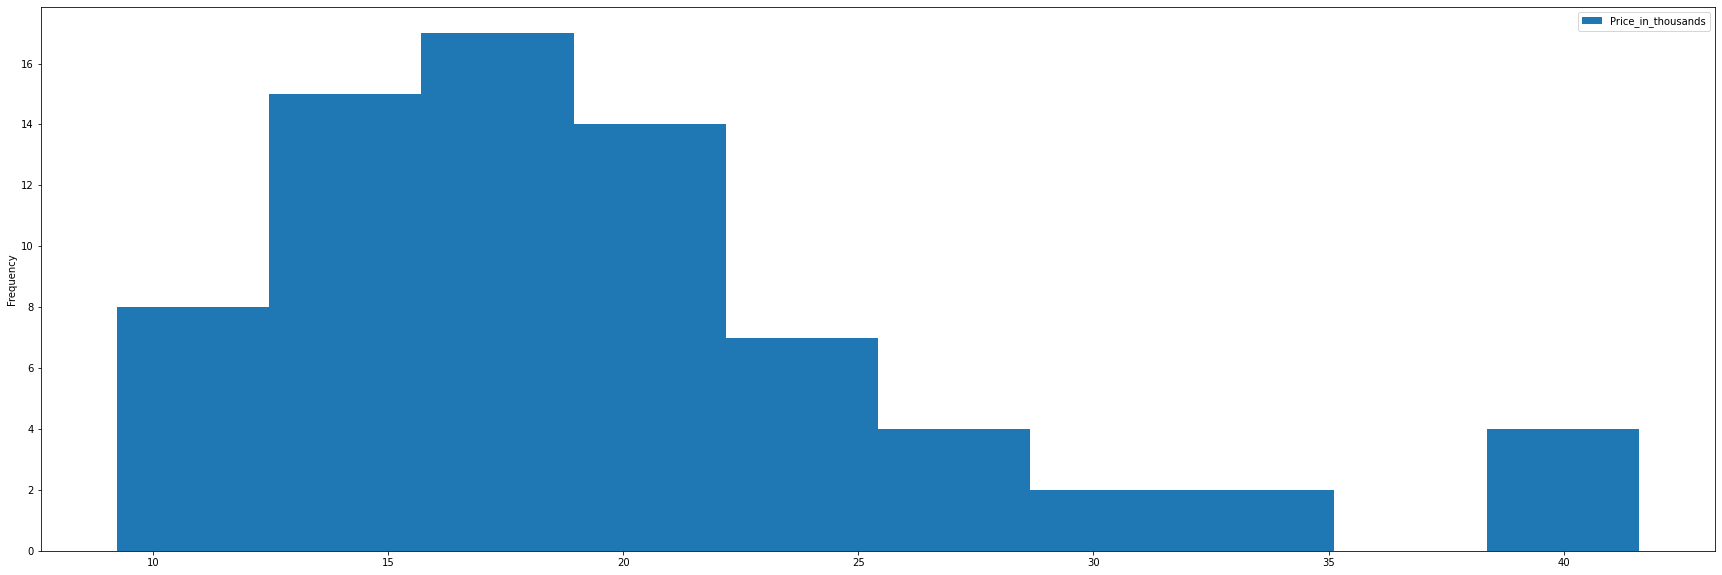

In [66]:
cl1.plot(x='Manufacturer', y = 'Price_in_thousands', kind = 'hist', figsize=(30,10))